Principal Component Analysis (PCA) is a dimensionality reduction method that finds a set of orthogonal axes, known as principal components, which capture the highest variance in the data. These principal components are linear combinations of the original dataset variables and are ranked by their significance. The combined variance of all principal components equals the total variance of the original data. The first principal component captures the most variance, while each subsequent component captures the maximum variance orthogonal to the preceding components.

In Principal Component Analysis, it is assumed that the variance of the features holds the information. Thus, a feature with greater variation is considered to carry more information.

### What is Principal Component Analysis(PCA)?
Principal Component Analysis(PCA) technique was introduced by the mathematician Karl Pearson in 1901. It works on the condition that while the data in a higher dimensional space is mapped to data in a lower dimension space, the variance of the data in the lower dimensional space should be maximum. 

### Principal Component Analysis (PCA) is a statistical procedure that uses an orthogonal transformation that converts a set of correlated variables to a set of uncorrelated variables.PCA is the most widely used tool in exploratory data analysis and in machine learning for predictive models. Moreover, 

Principal Component Analysis (PCA) is an unsupervised learning algorithm technique used to examine the interrelations among a set of variables. It is also known as a general factor analysis where regression determines a line of best fit. 
The main goal of Principal Component Analysis (PCA) is to reduce the dimensionality of a dataset while preserving the most important patterns or relationships between the variables without any prior knowledge of the target variables. 
Principal Component Analysis (PCA) is used to reduce the dimensionality of a data set by finding a new set of variables, smaller than the original set of variables, retaining most of the sample’s information, and useful for the regression and classification of data.

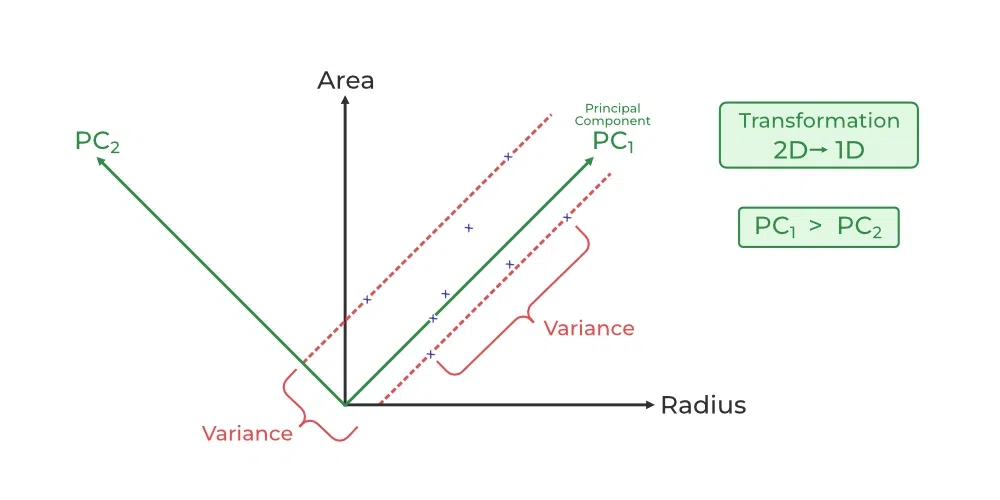 

1. Principal Component Analysis (PCA) is a technique for dimensionality reduction that identifies a set of orthogonal axes, called principal components, that capture the maximum variance in the data. The principal components are linear combinations of the original variables in the dataset and are ordered in decreasing order of importance. The total variance captured by all the principal components is equal to the total variance in the original dataset.

2. The first principal component captures the most variation in the data, but the second principal component captures the maximum variance that is orthogonal to the first principal component, and so on. 

3. Principal Component Analysis can be used for a variety of purposes, including data visualization, feature selection, and data compression. In data visualization, PCA can be used to plot high-dimensional data in two or three dimensions, making it easier to interpret. In feature selection, PCA can be used to identify the most important variables in a dataset. In data compression, PCA can be used to reduce the size of a dataset without losing important information.

4. In Principal Component Analysis, it is assumed that the information is carried in the variance of the features, that is, the higher the variation in a feature, the more information that features carries.

Step-By-Step Explanation of PCA (Principal Component Analysis)
Step 1: Standardization
First, we need to standardize our dataset to ensure that each variable has a mean of 0 and a standard deviation of 1.



Covariance Matrix Computation
Covariance measures the strength of joint variability between two or more variables, indicating how much they change in relation to each other. To find the covariance we can use the formula:

$ cov(x1,x2) = \frac{\sum_{i=1}^{n}(x1_i-\bar{x1})(x2_i-\bar{x2})}{n-1}  $     

The value of covariance can be positive, negative, or zeros.


* Positive: As the x1 increases x2 also increases.
* Negative: As the x1 increases x2 also decreases.
* Zeros: No direct relation

Compute Eigenvalues and Eigenvectors of Covariance Matrix to Identify Principal Components
Let A be a square $ nXn $ matrix and X be a non-zero vector for which 

$ AX = \lambda X $      

for some scalar values $ \lambda $  . then $ \lambda $    is known as the eigenvalue of matrix A and X is known as the eigenvector of matrix A for the corresponding eigenvalue.

It can also be written as :

$ \begin{aligned} AX-\lambda X &= 0 \\ (A-\lambda I)X &= 0 \end{aligned}     $  

where I am the identity matrix of the same shape as matrix A. And the above conditions will be true only if $ (A - \lambda I)   $     will be non-invertible (i.e. singular matrix). That means,

$ |A - \lambda I| = 0   $    

From the above equation, we can find the eigenvalues $ \lambda $, and therefore corresponding eigenvector can be found using the equation 
$ AX = \lambda X   $    

In [1]:
import pandas as pd
import numpy as np

# Here we are using inbuilt dataset of scikit learn
from sklearn.datasets import load_breast_cancer

# instantiating
cancer = load_breast_cancer(as_frame=True)
# creating dataframe
df = cancer.frame

# checking shape
print('Original Dataframe shape :',df.shape)

# Input features
X = df[cancer['feature_names']]
print('Inputs Dataframe shape :', X.shape)

Original Dataframe shape : (569, 31)
Inputs Dataframe shape : (569, 30)


In [2]:
# Mean
X_mean = X.mean()

# Standard deviation
X_std = X.std()

# Standardization
Z = (X - X_mean) / X_std


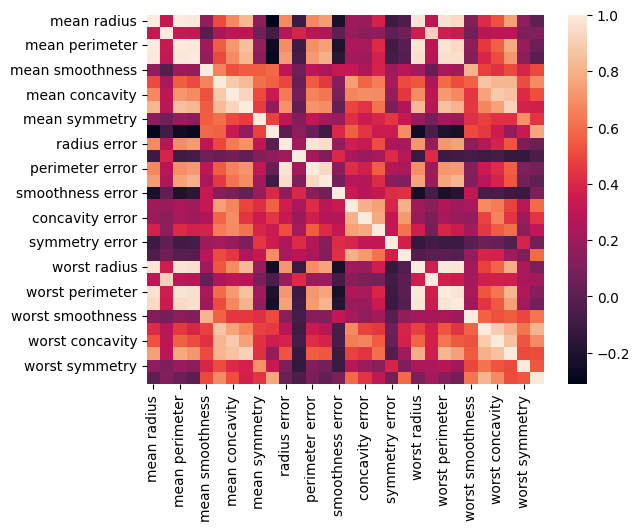

In [3]:
# covariance
c = Z.cov()

# Plot the covariance matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(c)
plt.show()


In [4]:
eigenvalues, eigenvectors = np.linalg.eig(c)
print('Eigen values:\n', eigenvalues)
print('Eigen values Shape:', eigenvalues.shape)
print('Eigen Vector Shape:', eigenvectors.shape)


Eigen values:
 [1.32816077e+01 5.69135461e+00 2.81794898e+00 1.98064047e+00
 1.64873055e+00 1.20735661e+00 6.75220114e-01 4.76617140e-01
 4.16894812e-01 3.50693457e-01 2.93915696e-01 2.61161370e-01
 2.41357496e-01 1.57009724e-01 9.41349650e-02 7.98628010e-02
 5.93990378e-02 5.26187835e-02 4.94775918e-02 1.33044823e-04
 7.48803097e-04 1.58933787e-03 6.90046388e-03 8.17763986e-03
 1.54812714e-02 1.80550070e-02 2.43408378e-02 2.74394025e-02
 3.11594025e-02 2.99728939e-02]
Eigen values Shape: (30,)
Eigen Vector Shape: (30, 30)


In [5]:
# Index the eigenvalues in descending order 
idx = eigenvalues.argsort()[::-1]

# Sort the eigenvalues in descending order 
eigenvalues = eigenvalues[idx]

# sort the corresponding eigenvectors accordingly
eigenvectors = eigenvectors[:,idx]


In [6]:
explained_var = np.cumsum(eigenvalues) / np.sum(eigenvalues)
explained_var


array([0.44272026, 0.63243208, 0.72636371, 0.79238506, 0.84734274,
       0.88758796, 0.9100953 , 0.92598254, 0.93987903, 0.95156881,
       0.961366  , 0.97007138, 0.97811663, 0.98335029, 0.98648812,
       0.98915022, 0.99113018, 0.99288414, 0.9945334 , 0.99557204,
       0.99657114, 0.99748579, 0.99829715, 0.99889898, 0.99941502,
       0.99968761, 0.99991763, 0.99997061, 0.99999557, 1.        ])

In [7]:
n_components = np.argmax(explained_var >= 0.50) + 1
n_components


2

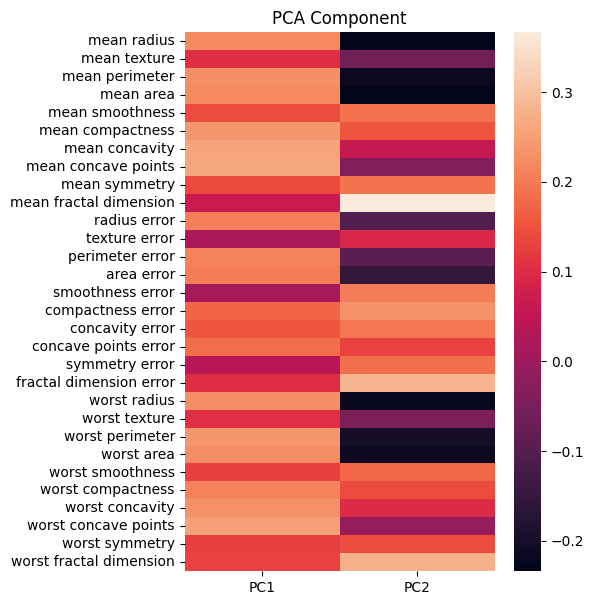

In [8]:
# PCA component or unit matrix
u = eigenvectors[:,:n_components]
pca_component = pd.DataFrame(u,
							index = cancer['feature_names'],
							columns = ['PC1','PC2']
							)

# plotting heatmap
plt.figure(figsize =(5, 7))
sns.heatmap(pca_component)
plt.title('PCA Component')
plt.show()


In [9]:
# Importing PCA
from sklearn.decomposition import PCA

# Let's say, components = 2
pca = PCA(n_components=2)
pca.fit(Z)
x_pca = pca.transform(Z)

# Create the dataframe
df_pca1 = pd.DataFrame(x_pca,
					columns=['PC{}'.
					format(i+1)
						for i in range(n_components)])
print(df_pca1)


           PC1        PC2
0     9.184755   1.946870
1     2.385703  -3.764859
2     5.728855  -1.074229
3     7.116691  10.266556
4     3.931842  -1.946359
..         ...        ...
564   6.433655  -3.573673
565   3.790048  -3.580897
566   1.255075  -1.900624
567  10.365673   1.670540
568  -5.470430  -0.670047

[569 rows x 2 columns]


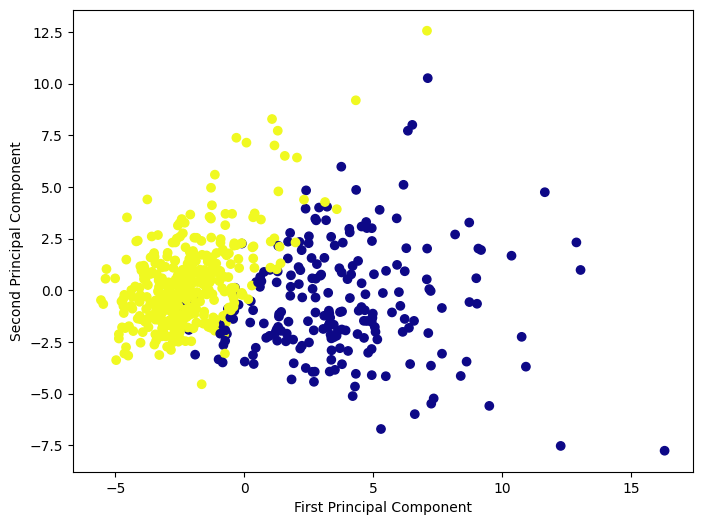

In [10]:
# giving a larger plot
plt.figure(figsize=(8, 6))

plt.scatter(x_pca[:, 0], x_pca[:, 1],
			c=cancer['target'],
			cmap='plasma')

# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()


In [11]:
# components
pca.components_


array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])